## Extracting data from a CDP questionnary in docx format

In [107]:
#specific to extracting information from word documents
import os
import zipfile

#other tools useful in extracting the information from our document
import re

#to pretty print our xml:
import xml.dom.minidom
import xml.etree.ElementTree as ET
import PyPDF2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [108]:
os.listdir('.')

['CDP_data_extraction.ipynb',
 'Renault 2020.docx',
 'Renault 2018.docx',
 'Renault 2019.docx',
 'Renault 2019.pdf',
 'Renault 2018.pdf',
 '.ipynb_checkpoints',
 'Carbometrix_Project']

In [109]:
os.listdir('..')

['sho_Halim',
 'web_scraping_example.ipynb',
 'Maachou_Maroua',
 'transfusion.owl',
 'metaheuristiques',
 '.ipynb_checkpoints',
 'Carbometrix',
 'products.csv']

In [110]:
#extract the xml file from a docx
document = zipfile.ZipFile('../Carbometrix/Renault 2020.docx')
xml_content = document.read('word/document.xml')
document.namelist()

['word/numbering.xml',
 'word/settings.xml',
 'word/fontTable.xml',
 'word/styles.xml',
 'word/document.xml',
 'word/_rels/document.xml.rels',
 '_rels/.rels',
 'word/theme/theme1.xml',
 '[Content_Types].xml']

In [111]:
"""
Source to implement this part:

"ElementTree"

https://docs.python.org/2/library/xml.etree.elementtree.html#module-xml.etree.ElementTree

"""
#Error: ET.parse(xml_content)
#It should be the name of a XML file. In this case we use ET.fromstring funciton. 
#Source https://docs.python.org/2/library/xml.etree.elementtree.html#xml.etree.ElementTree.fromstring

root = ET.fromstring(xml_content) #tree in an Element 
for child in root:
    print(child.tag, child.attrib)

{http://schemas.openxmlformats.org/wordprocessingml/2006/main}body {}


In [112]:
"""

This part is necessary to visualize the questionnary content

In other words, it is to help me to find pattern and have a global idea about thq questionnary

"""
xml_content = document.read('word/document.xml')

uglyXml = xml.dom.minidom.parseString(xml_content).toprettyxml(indent='  ')

text_re = re.compile('>\n\s+([^<>\s].*?)\n\s+</', re.DOTALL)    
prettyXml = text_re.sub('>\g<1></', uglyXml)

print(prettyXml)

<?xml version="1.0" ?>
<w:document xmlns:a="http://schemas.openxmlformats.org/drawingml/2006/main" xmlns:c="http://schemas.openxmlformats.org/drawingml/2006/chart" xmlns:dgm="http://schemas.openxmlformats.org/drawingml/2006/diagram" xmlns:lc="http://schemas.openxmlformats.org/drawingml/2006/lockedCanvas" xmlns:m="http://schemas.openxmlformats.org/officeDocument/2006/math" xmlns:mc="http://schemas.openxmlformats.org/markup-compatibility/2006" xmlns:o="urn:schemas-microsoft-com:office:office" xmlns:pic="http://schemas.openxmlformats.org/drawingml/2006/picture" xmlns:r="http://schemas.openxmlformats.org/officeDocument/2006/relationships" xmlns:sl="http://schemas.openxmlformats.org/schemaLibrary/2006/main" xmlns:v="urn:schemas-microsoft-com:vml" xmlns:w="http://schemas.openxmlformats.org/wordprocessingml/2006/main" xmlns:w10="urn:schemas-microsoft-com:office:word" xmlns:w14="http://schemas.microsoft.com/office/word/2010/wordml" xmlns:w15="http://schemas.microsoft.com/office/word/2012/wordm

In [113]:
#Taking only w:t strings. 
questionary = re.findall('<w:t xml.*?><', str(xml_content))


#Removing XML sintax from strings
for i in range(len(questionary)):
    questionary[i] = re.sub('<w:t xml:space="preserve">', '', questionary[i])
    questionary[i] = re.sub('</w:t><','', questionary[i])
    
print(questionary)

['Renault - Climate Change 2020', 'C0. Introduction', 'C0.1', '(C0.1) Give a general description and introduction to your organization.', 'The Group\\xe2\\x80\\x99s activities have been organized into two main types of operating activities, in 134 countries: ', '1. Automotive, with the design, manufacture and distribution of products through its distribution network (including the Renault Retail Group subsidiary): ', '- New vehicles, with several ranges ( passenger cars, light commercial vehicles and electric vehicles  ) marketed under five brands: Renault, Dacia, Renault Samsung Motors, Alpine and Lada. Vehicles manufactured by Dacia and RSM may be sold under the Renault badge in some countries, ', '- Used vehicles and spare parts, ', '- The Renault powertrain range, sold business-to-business;', '2.  Miscellaneous services: sales financing, leasing, maintenance and service contracts. ', 'In addition, Renault has equity investments in the following two companies: ', '- Renault\\xe2\\x8

In [114]:
"""
Defining the title of the questionary
"""
title = questionary[0]
print(title)
questionary = questionary[1:]

Renault - Climate Change 2020


In [115]:
"""
Organizing our questionary in sections 

The list 'sections' has the information about each section within the questionary.

"""

sections_name = ['C0. Introduction', 
                'C1. Governance', 
                'C2. Risks and opportunities', 
                'C3. Business Strategy', 
                'C4. Targets and performance',
                'C5. Emissions methodology',
                'C6. Emissions data',
                'C7. Emissions breakdowns',
                'C8. Energy',
                'C9. Additional metrics',
                'C10. Verification',
                'C11. Carbon pricing',
                'C12. Engagement',
                'C14. Signoff',
                ]

str_quest, sections = [], []

sections_name = sections_name[1:] #I need to take of 'C0: Introduction' to guarentee that the first section will be introduction

for phrase in questionary:
    if phrase in sections_name:
        sections.append(str_quest)
        sections_name = sections_name[1:]
        str_quest = []
    str_quest.append(phrase)
    

In [116]:
subsection_name = []
subsection = "C"

for i in range(len(sections)):
    subsection += str(i) + "."
    for j in range(20):
        subsection_name.append(subsection + str(j+1))
    subsection = "C"
    
all_subsections = []
for i in range(len(sections)):
    for j in range(len(sections[i])):
        if sections[i][j] in subsection_name:
            all_subsections.append(sections[i][j])

    

In [117]:
"""
In order to increase our data specification, in this cell has the list subsections, where is possible to access
each subsection of a section (Introduction, Governance, etc.).

"""

def taking_text(text, list_name):
    text = text[1:]
    sub_text = []    
    i = 0
    while text[i] not in list_name:
        sub_text.append(text[i])
        i += 1
        if i >= len(text):
            break
    return sub_text

sub_text = []
subsections = []
for i in range(len(sections)):
    for j in range(len(sections[i])):
        if sections[i][j] in all_subsections:
            text = sections[i][j:]
            sub_text.append(taking_text(text, all_subsections))
            subsections_name = all_subsections[1:]
    subsections.append(sub_text)
    sub_text = []



### Taking all data we need 

- Title
- Start and end date
- Scope 1 emissions
- Scope 2 emissions (location-based and market-based
- Scope 3 data (15 + 2 categories)

In [118]:
subsections[0][1]

['(C0.2) State the start and end date of the year for which you are reporting data.',
 'Start date',
 'End date',
 'Indicate if you are providing emissions data for past reporting years',
 'Select the number of past reporting years you will be providing emissions data for',
 'Reporting year',
 'January 1 2019',
 'December 31 2019',
 'No',
 '&lt;Not Applicable&gt;']

In [119]:
for i in range(len(subsections[0][1])):
    if subsections[0][1][i] == 'Row 1' or subsections[0][1][i] == 'Reporting year':
        start_date = subsections[0][1][i+1]
        end_date = subsections[0][1][i+2]
        
print(start_date)
print(end_date)


January 1 2019
December 31 2019


In [120]:
scope1 = [s for s in subsections[6][0][1:] if s.isdigit()]
scope1 = int(scope1[0])
scope1

626947

In [121]:
scope2 = [s for s in subsections[6][2][1:] if s.isdigit()]
scope2_location_based = int(scope2[0])
scope2_market_based = int(scope2[1])
scope2_location_based, scope2_market_based

(697096, 585404)

In [122]:
#### C6.5
"""
***Sources of Scope 3 emissions***

0 - Purchased goods and services 
1 - Capital goods
2 - Fuel-and-energy-related activities (not included in Scope 1 or 2)
3 - Upstream transportation and distribution
4 - Waste generated in operations
5 - Business travel
6 - Employee commuting
7 - Upstream leased assets
8 - Downstream transportation and distribution
9 - Processing of sold products
10 - Use of sold products
11 - End of life treatment of sold products
12 - Downstream leased assets
13 - Franchises
14 - Investments
15 - Other (upstream)
16 - Other (downstream)
"""

scope3_sections = ['Evaluation status', 'Metric tonnes CO2e', 'Percentage of emissions calculated using data obtained from suppliers or value chain partners']

scope3_data = []
for i in range(len(subsections[6][4])):
    if subsections[6][4][i] in scope3_sections:
        if subsections[6][4][i] == 'Evaluation status':
            scope3_data.append(subsections[6][4][i-1])
        #elif if subsections[6][4][i] == 'Metric tonnes C02e':   
        scope3_data.append(subsections[6][4][i+1])
        

scope3_data = [s.replace('&lt;', '<') for s in scope3_data]
scope3_data = [s.replace('&gt;', '>') for s in scope3_data]
scope3_data = np.reshape(scope3_data, (17,4)).tolist()

In [123]:
scope3_data

[['Purchased goods and services', 'Relevant, calculated', '10896583', '1'],
 ['Capital goods', 'Relevant, calculated', '1847004', '0'],
 ['Fuel-and-energy-related activities (not included in Scope 1 or 2)',
  'Not relevant, calculated',
  '140436',
  '0'],
 ['Upstream transportation and distribution',
  'Relevant, calculated',
  '591167',
  '0'],
 ['Waste generated in operations', 'Relevant, calculated', '997488', '0'],
 ['Business travel', 'Not relevant, calculated', '43614', '100'],
 ['Employee commuting', 'Not relevant, calculated', '27856', '0'],
 ['Upstream leased assets',
  'Not relevant, explanation provided',
  '<Not Applicable>',
  '<Not Applicable>'],
 ['Downstream transportation and distribution',
  'Relevant, calculated',
  '622728',
  '0'],
 ['Processing of sold products', 'Not relevant, calculated', '842', '100'],
 ['Use of sold products', 'Relevant, calculated', '81602027', '0'],
 ['End of life treatment of sold products',
  'Relevant, calculated',
  '1841764',
  '1'],
 

In [124]:
print(title)
print(start_date)
print(end_date)
print()

Renault - Climate Change 2020
January 1 2019
December 31 2019



In [125]:
df_data = pd.DataFrame({'Title': [title],
                   'Start Date': [start_date],
                   'End Date': [end_date],
                   'Scope 1': [scope1],
                   'Scope 2 (location-based)': [scope2_location_based],
                   'Scope 2 (market-based)': [scope2_market_based],
                   'Purchased goods and services': [scope3_data[0][2]],
                   'Capital goods': [scope3_data[1][2]],
                   'Use of sold products': scope3_data[10][2]})
df_data

,Title,Start Date,End Date,Scope 1,Scope 2 (location-based),Scope 2 (market-based),Purchased goods and services,Capital goods,Use of sold products
0,Renault - Climate Change 2020,January 1 2019,December 31 2019,626947,697096,585404,10896583,1847004,81602027


In [126]:
dic_scope3 = {}

for i in range(len(scope3_data)):
    dic_scope3[scope3_data[i][0]] = scope3_data[i][1:]
    
df_scope3 = pd.DataFrame(dic_scope3)
df_scope3.T

,0,1,2
Purchased goods and services,"Relevant, calculated",10896583,1
Capital goods,"Relevant, calculated",1847004,0
Fuel-and-energy-related activities (not included in Scope 1 or 2),"Not relevant, calculated",140436,0
Upstream transportation and distribution,"Relevant, calculated",591167,0
Waste generated in operations,"Relevant, calculated",997488,0
Business travel,"Not relevant, calculated",43614,100
Employee commuting,"Not relevant, calculated",27856,0
Upstream leased assets,"Not relevant, explanation provided",<Not Applicable>,<Not Applicable>
Downstream transportation and distribution,"Relevant, calculated",622728,0
Processing of sold products,"Not relevant, calculated",842,100


In [131]:
scope3_emissions = [[scope3_data[i][0], scope3_data[i][2]] for i in range(len(scope3_data)) if scope3_data[i][2].isdigit()]
#scope3_emissions

In [128]:
categories, emissions = [], []
for s in scope3_emissions:
    categories.append(s[0])
    emissions.append(int(s[1]))

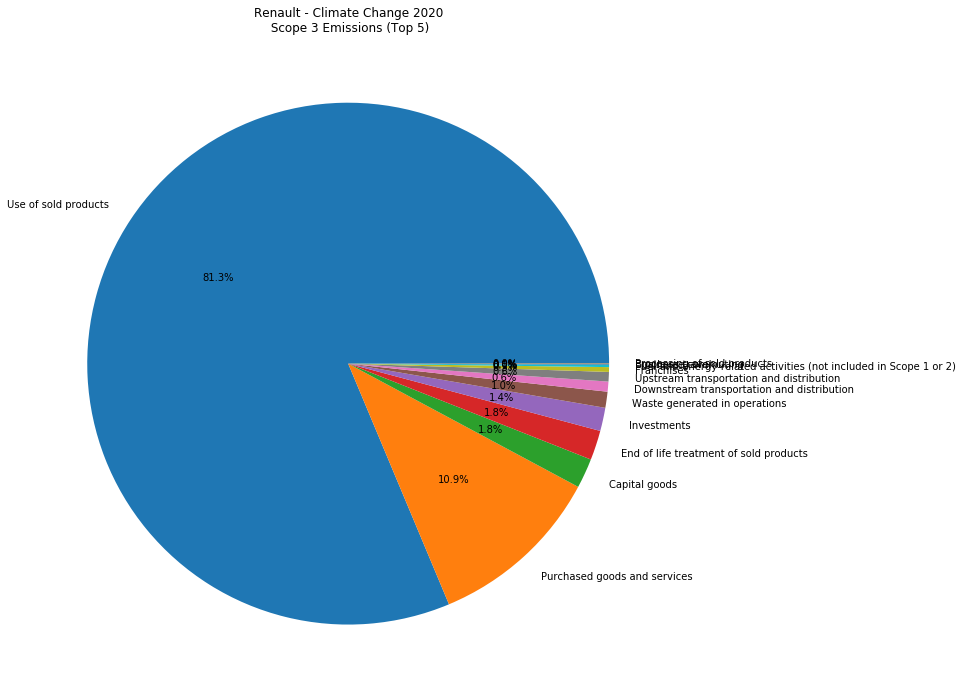

In [130]:
emissions_sorted_idx = np.argsort(emissions)
emissions_sorted_idx = emissions_sorted_idx[::-1]
categories, emissions = np.array(categories), np.array(emissions)


plt.figure(figsize=(12,12))
plt.pie(emissions[emissions_sorted_idx], labels=categories[emissions_sorted_idx], autopct='%1.1f%%', radius=1)
plt.title(title + '\n Scope 3 Emissions (Top 5)')
plt.show()